In [1]:
import numpy as np
import cv2
import pytesseract
import matplotlib.pyplot as plt
import os

In [4]:
input = np.array([1, 2, 3, 4, 5, 6]) # Raw array of 1s or 0s 
height = 2 # Height of desired img 
width = 3 # Widht of desired img 

In [5]:
image = np.resize(input, (height, width))

In [76]:
# Read in image (temporary cell for debugging)
image = cv2.imread('download.png')


In [64]:
# Code from website below, probably won't need to cvtColor if we get our image as 1s and 0s
# Still need blur and possibly median filtering to get rid of noise, then threshold + more post-image processing if necessary
# https://stackoverflow.com/questions/37745519/use-pytesseract-ocr-to-recognize-text-from-an-image

# Grayscale, Gaussian blur, Otsu's threshold
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# # Morph open to remove noise and invert image
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
# invert = 255 - opening

# Perform text extraction
output = pytesseract.image_to_string(gray, lang='eng', config='--psm 6')
print(output)

It was the best of
times, it was the worst
of times, it was the age
of wisdom, it was the
age of foolishness...



In [65]:
# Replace newlines with spaces so say doesn't crash
output = output.replace('\n', ' ')

In [66]:
# Actually output text to speech, requires MacOS
os.system("say -v 'Samantha' " + output)

0

# If you want to visualize the bounding boxes of the text

## Per character bounding boxes

In [77]:
img = image.copy()

In [78]:
# https://nanonets.com/blog/ocr-with-tesseract/#:~:text=Pytesseract%20or%20Python%2Dtesseract%20is,image%20to%20text%20use%20cases. 
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    char_img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)


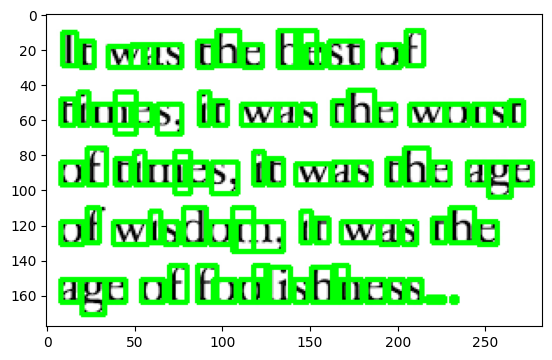

In [79]:
# cv2.imshow('char_img', char_img)
# cv2.waitKey(0)
plt.imshow(char_img)

## Per word bounding boxes

In [80]:
from pytesseract import Output

In [81]:
img = image.copy()

In [82]:
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [83]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

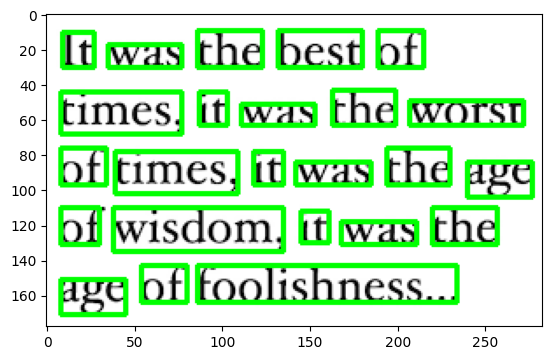

In [84]:
plt.imshow(img)